<a href="https://colab.research.google.com/github/joacoguerra2/smokingSignalsCoderhouse/blob/main/SegundaEntrega_Fernandez_y_Guerra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primera Entrega**  
  
# Abstracto

**Dataset elegido:** Señales de humo de cigarro en el cuerpo.
  
Fumar cigarrillos tiene graves impactos en la salud de quienes fuman y de las personas que los rodean.    
Recientemente se han investigado varias modalidades de detección para recopilar datos objetivos sobre el tabaquismo diario, incluida la detección de episodios de tabaquismo a partir de patrones de respiración, comportamiento de mano a boca y gestos característicos de las manos o eventos de iluminación de cigarrillos.  
Nos motiva proporcionar una nueva visión de estas investigaciones. Este modelo propone identificar a través de conjuntos de datos recolectados de señales biológicas de salud, si hay presencia o ausencia de tabaquismo y los problemas de salud o cambios fisiológicos que genera tanto la presencia o la ausencia.  
La adicción a la nicotina es difícil de vencer porque cambia su cerebro. El cerebro desarrolla receptores de nicotina adicionales para acomodar las grandes dosis de nicotina del tabaco. Cuando el cerebro deja de recibir la nicotina a la que está acostumbrado, el resultado es la abstinencia de nicotina. Puede sentirse ansioso, irritable y tener fuertes antojos de nicotina.    
El proyecto se dirige a todas aquellas personas que, tanto investigan sobre el impacto que tiene el tabaquismo para la salud como para aquellos que trabajan a diario con esta población.  





# Preguntas/Hipotesis
Los datos extraídos nos permiten hacer las siguientes preguntas:

* ¿Cómo afecta el humo de tabaco a los órganos y al cuerpo en general? 
* ¿Las personas que fuman tienen mayor poder visual que las personas que no fuman?  
* ¿Los fumadores tienen una mayor probabilidad de enfermedades del corazón? 
* ¿Fumar aumenta el colesterol? ¿El promedio de este es mayor para fumadores?   
* ¿Los fumadores tienen la hemoglobina mas alta?  
  
Esta demostrado que fumar es perjudicial para la salud, pero nuestra hipótesis se basa en respaldar estas preguntas a través del modelo que crearemos a partir de los datos extraídos.  
Creemos que puede variar los cambios en la salud, sin importar si fuman o no. Es decir, hay mas chances de contraer enfermedades por fumar, pero tambien hay posibilidad de que algunos fumadores tengan mejor estado de salud en algunas señales biologicas que los que no fuman.
Para esto trataremos de contestar las preguntas planteadas y demostrar a traves de visualizaciones y del modelo, esta hipotesis.

# Definicion de objetivo
El objetivo es determinar la presencia o ausencia de tabaquismo a través de bioseñales, usando un modelo de clasificación.

# Contexto Comercial
La estrategia para llegar a nuestro objetivo es crear un modelo de clasificación y comparar estos modelos para ver cual soluciona mejor nuestro problema. A futuro necesitamos que este modelo siga funcionando de forma eficiente para ello:
Utilizando machine learning , habilitando la tecnología utilizada para analizar estos datos y “training -a ”constantemente para hacerlo aún mejor (en términos de habilidades predictivas, incorporando nuevos conocimientos y factores de impacto).  
Como entrega seran los conocimientos, información y datos nuevos que respaldarán la toma de decisiones. La implementación de acciones y la medición precisa de sus resultados en diferentes aspectos del negocio.

# Problema Comercial
El problema actual es poder resolver como afecta el humo de tabaco en el cuerpo a traves del dataset elegido, entonces a traves de este modelo podremos ayudar a consolidar la informacion y poder sacar insights para responder a las preguntas de hipotesis. 

# Contexto analitico
El set de datos consta de una colección de datos básicos de señales biológicas de salud.
Se extrajo la informacion de la siguiente pagina: https://www.kaggle.com/
haciendo foco a "Body signal of smoking".
Consta de un solo dataset con variables que describen las diferente señales biologicas de salud, como por ejemplo, la hemoglobina en sangre, colesterol, etc. Tambien cuenta con el genero y edades de las personas en el dataset y descripciones fiosologicas como el peso y altura.

Sabiendo el contexto y el porque queremos investigar sobre el humo de tabaco en el cuerpo, cargamos nuestro dataset y nos proponemos a explorarlo, manejando outliers y limpieza de datos:

# **Importación de los datos**

Elegimos la api de kaggle tanto para importar nuestro set de datos principal como para complementar el mismo con otros.

Dandole permisos a Colab para que se integre con Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se importan las librerías a utilizar:

In [ ]:
!pip install kaggle
import pandas as pd
import math
pd.set_option('max_columns', None)    # Configuracion pandas
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from google.colab import files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content/drive/MyDrive/Github/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Github/'
/content


Para poder conectarse con la API de kaggle es necesario contar un archivo que se debe descargar de la cuenta personal en Kaggle, llamado Kaggle.json. Es un API Token, este json contiene las credenciales de la API. 
El siguiente codigo es para levantar este archivo dentro de colab:

In [ ]:
print("Upload kaggle.json file with your kaggle API token")

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Upload kaggle.json file with your kaggle API token


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


Una vez conectados con la API de kaggle, buscamos el data set a utilizar en nuestro proyecto "Body signal of smoking". La API permite buscar mediante una palabra clave, los set de datos relacionados a esta.

In [ ]:
!kaggle datasets list -s 'body signal of smoking'

ref                              title                   size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------  ----------------------  ----  -------------------  -------------  ---------  ---------------  
kukuroo3/body-signal-of-smoking  Body signal of smoking   3MB  2022-05-15 01:20:24           2826         79  0.7058824        
aahanmehra/signalsmoking         signalsmoking            1MB  2022-05-15 18:59:39              7          1  0.1764706        


Con el valor ubicado en el campo "ref" devuelto, se descarga el set de datos en formato zip, luego lo descomprimimos y lo asignamos a la variable df_smoking seteando como indice del dataframe a la columna 'ID'.

In [ ]:
!kaggle datasets download -d 'kukuroo3/body-signal-of-smoking '

  0% 0.00/3.40M [00:00<?, ?B/s]
100% 3.40M/3.40M [00:00<00:00, 209MB/s]


In [ ]:
!unzip 'body-signal-of-smoking .zip'

Archive:  body-signal-of-smoking .zip
  inflating: competition_format/x_test.csv  
  inflating: competition_format/x_train.csv  
  inflating: competition_format/y_test.csv  
  inflating: competition_format/y_train.csv  
  inflating: smoking.csv             


In [ ]:
basepath = "/content/"
df_smoking = pd.read_csv(basepath + "smoking.csv",index_col=0)

# **Importación de set de datos complementario**

Volvemos a utilizar la API de kaggle para importar un set de datos complementario que contiene información sobre usuarios afiliados a un seguro de salud y realizamos un join para agregar información a nuestro análisis.

In [ ]:
!kaggle datasets list -s 'Insurance Premium Data'

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
simranjain17/insurance                                      Insurance Premium Data                               16KB  2020-09-09 08:34:47           3062         57  1.0              
anmolkumar/health-insurance-cross-sell-prediction           Health Insurance Cross Sell Prediction 🏠 🏥            6MB  2020-09-11 18:39:31          27627        627  1.0              
arashnic/imbalanced-data-practice                           Learning from  Imbalanced Insurance Data              7MB  2020-11-23 20:47:34           2598         53  1.0              
teertha/ushealthinsurancedataset                            US Health Insurance 

In [ ]:
!kaggle datasets download -d 'simranjain17/insurance '

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 13.7MB/s]


In [ ]:
!unzip 'insurance '

Archive:  insurance .zip
  inflating: insurance.csv           


Se realizan las siguientes transformaciones al set de datos complementario para poder, relacionarlo con el set principal a partir de algunas variables en común:



*   Reemplazar los valores de la columna smoker "yes" y "no" por 1 y 0 respectivamente ya que así están representados en el otro dataframe.
*   Reemplazar los valores "female" y "male" en la columna sex por "F" y "M" por el mismo motivo.
*   Se crea el campo age_round que agrupa a los usuarios por edades de a 5 años al igual que el campo age del dataframe original.





In [ ]:
df_insurance = pd.read_csv(basepath + "insurance.csv")
df_insurance.smoker.replace(to_replace="yes",value=1,inplace=True)
df_insurance.smoker.replace(to_replace="no",value=0,inplace=True)
df_insurance.sex.replace(to_replace="female",value='F',inplace=True)
df_insurance.sex.replace(to_replace="male",value='M',inplace=True)
df_insurance['age_round']=(df_insurance.age/5).astype(int)*5
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_round
0,19,F,27.900,0,1,southwest,16884.92400,15
1,18,M,33.770,1,0,southeast,1725.55230,15
2,28,M,33.000,3,0,southeast,4449.46200,25
3,33,M,22.705,0,0,northwest,21984.47061,30
4,32,M,28.880,0,0,northwest,3866.85520,30


Creamos el dataframe "grouped_insurance" que contiene el promedio del indice de masa corporal ("bmi") agrupado por las columnas "sex" y "age_round" ya que son dos variables que podemos relacionar con el set original para luego poder comparar nuestros registros con los registros de las personas afiliadas al sistema de salud.

In [ ]:
grouped_insurance = (df_insurance.groupby(by=['sex','age_round']).mean().bmi).to_frame()
print(grouped_insurance.head())

                     bmi
sex age_round           
F   15         30.991288
    20         29.287868
    25         28.505896
    30         29.823154
    35         29.665161


In [ ]:
df_final = df_smoking.merge(grouped_insurance,how='left',right_on=['age_round','sex'],left_on=['age','gender'],suffixes=('_smoking','_insurance'))
df_final.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,bmi
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0,30.821418
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0,30.821418
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1,32.269048
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0,30.390882
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0,30.821418


Agregamos al set de datos la columna "calc_bmi" que calcula el indice de masa corporal del usuario para compararlo contra el promedio obtenido del set complementario y la columna "bmi_comp" que contiene True si el indice de masa corporal es mayor que el promedio obtenido para su grupo etario y sexo y False en caso contrario.

In [ ]:
df_final['calc_bmi'] = df_final['weight(kg)']/((df_final['height(cm)']/100)**2)
df_final['bmi_comp'] = df_final['calc_bmi'] > df_final['bmi']

# EDA - EXPLORACIÓN DE LOS DATOS

In [ ]:
df_eda=df_final.copy()
print('Forma del dataset:')
print(df_eda.shape)

Forma del dataset:
(55692, 29)


Tamaño del dataframe: 55692 filas y 29 columnas.

A continuación presentamos las estadisticas descriptivas de las variables numericas para comprender mejor nuestros datos:

In [ ]:
df_eda.describe().round(2).T.style.background_gradient(cmap = "coolwarm_r")

,count,mean,std,min,25%,50%,75%,max
age,55692.000000,44.180000,12.070000,20.000000,40.000000,40.000000,55.000000,85.000000
height(cm),55692.000000,164.650000,9.190000,130.000000,160.000000,165.000000,170.000000,190.000000
weight(kg),55692.000000,65.860000,12.820000,30.000000,55.000000,65.000000,75.000000,135.000000
waist(cm),55692.000000,82.050000,9.270000,51.000000,76.000000,82.000000,88.000000,129.000000
eyesight(left),55692.000000,1.010000,0.490000,0.100000,0.800000,1.000000,1.200000,9.900000
eyesight(right),55692.000000,1.010000,0.490000,0.100000,0.800000,1.000000,1.200000,9.900000
hearing(left),55692.000000,1.030000,0.160000,1.000000,1.000000,1.000000,1.000000,2.000000
hearing(right),55692.000000,1.030000,0.160000,1.000000,1.000000,1.000000,1.000000,2.000000
systolic,55692.000000,121.490000,13.680000,71.000000,112.000000,120.000000,130.000000,240.000000
relaxation,55692.000000,76.000000,9.680000,40.000000,70.000000,76.000000,82.000000,146.000000


Veamos todas las variables:

In [ ]:
print(df_eda.columns)

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking', 'bmi', 'calc_bmi', 'bmi_comp'],
      dtype='object')


**Variables:**


*   ID : índice 
*   género
*   edad : Brecha de 5 años
*   altura (cm)
*   peso (kg) 
*   cintura (cm) : Longitud de la circunferencia de la cintura
*   vista (izquierda)
*   vista (derecha)
*   audición (izquierda)
*   audición(derecha)
*   sistólica : Presión arterial
*   relajación : Presión arterial
*   azúcar en la sangre en ayunas
*   Colesterol : total
*   triglicérido
*   HDL : tipo de colesterol
*   LDL : tipo de colesterol
*   hemoglobina
*   Proteína en orina
*   creatinina sérica
*   AST : tipo de transaminasa oxaloacética glutámica
*   ALT : tipo glutámico oxaloacético transaminasa
*   Gtp : γ-GTP
*   oral : Estado del examen oral
*   caries
*   sarro : estado del sarro
*   tabaquismo
*   bmi: índice de masa corporal promedio para su grupo etario y sexo dentro cálculado a partir de los usuarios de un seguro de salud.
*   calc_bmi: Índice de masa corporal
*   bmi_comp: Comparación entre bmi y calc_bmi. Si calc_bmi es mayor a bmi, el campo es True, de lo contrario es False



**En este caso creemos que muchas de las variables son potencialmente importantes, ya que se podrá estudiar la correlación de cada una de ellas con el tabaquismo.**

A continuación describiremos algunas de estas:
*   género: indica el sexo de la persona ("F"y "M").
*   edad: indica la edad de la persona en un rango de 5 años.
*   altura (cm): indica la altura de la persona en centímetros.
*   peso (kg): indica el peso de la persona en kilogramos.
*   sistólica y relajación: corresponden a la presión arterial del individuo.
*   HDL y LDL: son indicadores de colesterol.
*   caries: indica si la persona tiene caries  o no (1 o 0).
*   tabaquismo: es la variable de estudio, indica si la persona es fumadora o no.

Chequeamos valores unicos, tipo de datos de las columnas y si hay valores faltantes:

In [ ]:
def df_explore(df):
    print( 'Shape: ', df.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])
    
    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

df_explore(df_eda)

Shape:  (55692, 29)
+---------------------+---------+----------+-------+--------+-------------------+
|        Column       |   Type  | Non-Null | Nulls | Unique |      Example      |
+---------------------+---------+----------+-------+--------+-------------------+
|        gender       |  object |  55692   |   0   |   2    |         F         |
|         age         |  int64  |  55692   |   0   |   14   |         40        |
|      height(cm)     |  int64  |  55692   |   0   |   13   |        155        |
|      weight(kg)     |  int64  |  55692   |   0   |   22   |         60        |
|      waist(cm)      | float64 |  55692   |   0   |  566   |        81.3       |
|    eyesight(left)   | float64 |  55692   |   0   |   19   |        1.2        |
|   eyesight(right)   | float64 |  55692   |   0   |   17   |        1.0        |
|    hearing(left)    | float64 |  55692   |   0   |   2    |        1.0        |
|    hearing(right)   | float64 |  55692   |   0   |   2    |        1.0      

*Hay 29 columnas y 55692 filas en el dataset. De las variables, 20 son flotantes, 5 son enteros, 1 es booleana y 3 son object.  
*La variable bmi cuenta con 3072 valores faltantes por lo que a estos valores les reasignamos el promedio de esta columna.

**La variable oral que indica el estado del examen oral, cuenta con un único valor, por lo que no va a ser una variable de utilidad a la hora de analizar cuales son las bioseñales que diferencian a un fumador de un no fumador.

In [ ]:
df_eda.bmi.fillna(value=df_eda.bmi.mean(),inplace=True)
df_final.bmi.fillna(value=df_final.bmi.mean(),inplace=True)

Volvemos a aplicar la función df_explore sobre el data frame y vemos que ya no existen valores faltantes para ninguna columna.

In [ ]:
df_explore(df_eda)

Shape:  (55692, 29)
+---------------------+---------+----------+-------+--------+-------------------+
|        Column       |   Type  | Non-Null | Nulls | Unique |      Example      |
+---------------------+---------+----------+-------+--------+-------------------+
|        gender       |  object |  55692   |   0   |   2    |         F         |
|         age         |  int64  |  55692   |   0   |   14   |         40        |
|      height(cm)     |  int64  |  55692   |   0   |   13   |        155        |
|      weight(kg)     |  int64  |  55692   |   0   |   22   |         60        |
|      waist(cm)      | float64 |  55692   |   0   |  566   |        81.3       |
|    eyesight(left)   | float64 |  55692   |   0   |   19   |        1.2        |
|   eyesight(right)   | float64 |  55692   |   0   |   17   |        1.0        |
|    hearing(left)    | float64 |  55692   |   0   |   2    |        1.0        |
|    hearing(right)   | float64 |  55692   |   0   |   2    |        1.0      

Verificamos valores unicos de las variables object:

In [ ]:
def df_unique_val_col(df, col_list = [] ):
    
    #Contamos la máxima cantidad de valores unicos que tienen los campos
    cant_table_col = 0
    for i in col_list:
        l = len(df[i].unique())
        if cant_table_col < l:
            cant_table_col = l
    
    # Creamos la lista de campos "value_x" para armar el indice y definir el tamaño de la tabla (altura)
    A = []
    for i in range(cant_table_col):
        A.append('Value : '+str(i))
    
    #creamos un dataframe vacio
    dg = pd.DataFrame(index = A,
                          columns = df[col_list].columns)    

    #Completamos el dataframe con los valores unicos sino lo rellenamos con '-'
    for m in df[col_list]:
        uni = df[m].unique()
        le = len(uni)
        
        for j in range(cant_table_col):
            if j < le:
                dg[m][j] = uni[j]
            else:
                dg[m][j] = '-'

    print('Valores únicos de las variables object')
    return dg

In [ ]:
# Variables de tipo object:
L = ['tartar','oral','gender']
df_unique_val_col(df_eda,L)

Valores únicos de las variables object


,tartar,oral,gender
Value : 0,Y,Y,F
Value : 1,N,-,M


# Analisis univariado:

# **¿Qué sabemos de las personas en el dataset?**

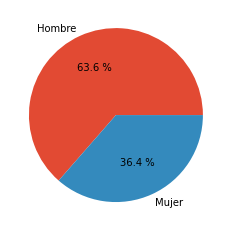

In [ ]:
gender_count = df_eda.gender.value_counts() #con el método value_counts() creamos la serie que cuenta la cantidad de registros por cada valor de gender
gender_count.index = ["Hombre","Mujer"] #renombramos los indices
plt.pie(gender_count, labels = gender_count.index, autopct="%0.1f %%")
plt.show()

**El portentaje de genero en el dataset es el siguiente:** \


*   Hombres = 63.6 %
*   Mujeres = 36.4 %



Agregamos otra gráfica de Torta para tener en cuenta el porcentaje de fumadores:

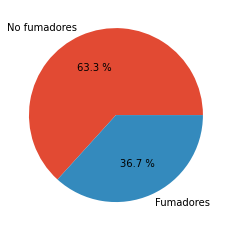

In [ ]:
smoking_count = df_eda.smoking.value_counts()
smoking_count.index = ["No fumadores","Fumadores"] #renombramos los indices
plt.pie(smoking_count, labels = smoking_count.index, autopct="%0.1f %%")
plt.show()

**El porcentaje de fumadores:** \
No fumadores = 63.3%\
Fumadores = 36.7%

Creamos un rango de edad en base al genero:

In [ ]:
pd.cut(df_eda['age'], bins=[18, 60, 100])
age_groups = pd.cut(df_eda['age'], bins=[18, 60, 100])
pd.crosstab(age_groups, df_eda['gender'])

gender,F,M
age,,
"(18, 60]",19044,33576
"(60, 100]",1247,1825


Gráficamos utilizando:

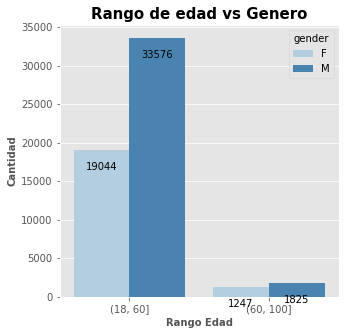

In [ ]:
fig5, ax=plt.subplots(figsize=(5,5)) 
sns.countplot(x=age_groups,hue=df_eda.gender, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Rango Edad', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad', fontsize=10, fontweight='bold')
plt.title('Rango de edad vs Genero', fontweight = 'bold', fontsize='15')
plt.show()

**En resumen:**  

* Hay mas hombres que mujeres.
* El rango de edad (18-60) tiene mas personas entre hombres y mujeres.
* Toda persona en el dataset es adulta.



In [ ]:
def graficos_exploratorios(df,column_name,sort_index=False):
    #Analisis de columnas y gráfico
    print(f'COLUMN: {column_name}')

   
    abs_values =df[column_name].value_counts()
    prc_values =(df[column_name].value_counts(normalize=True)*100).apply(lambda x:round(x,1))
    df_values = pd.merge(abs_values, prc_values, left_index=True, right_index=True, suffixes=('_abs','_prc'))
    
    
    if sort_index is True:
        df_values = df_values.sort_index(axis = 0)

    # Valores de trazado, titulos y nombres de ejes
    ax = df_values[column_name+'_abs'].plot(kind='bar', figsize=(12,6))
    ax.set_title(f"Cantidad de personas por {column_name}")
    ax.set_xlabel(column_name)
    ax.set_ylabel('Cantidad de personas')

    #Etiqueta sobre barras
    rects = ax.patches
    labels = [f'{p}%' for p in df_values[column_name+'_prc'].to_list()]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2 , height + 1, label,
                ha='center', va='bottom')
    
    return 

COLUMN: hearing(left)


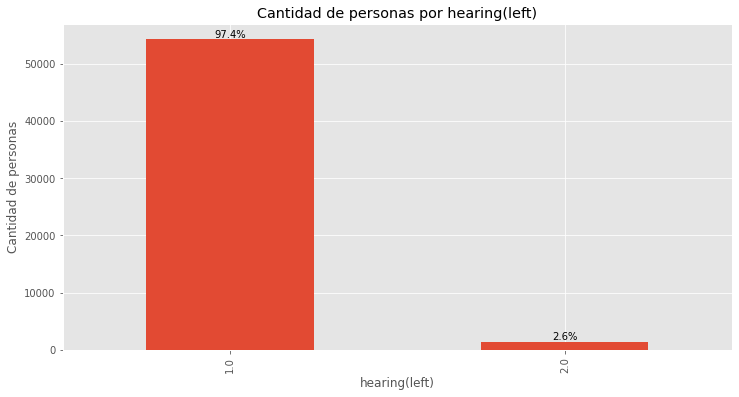

In [ ]:
graficos_exploratorios(df_eda,'hearing(left)')

COLUMN: hearing(right)


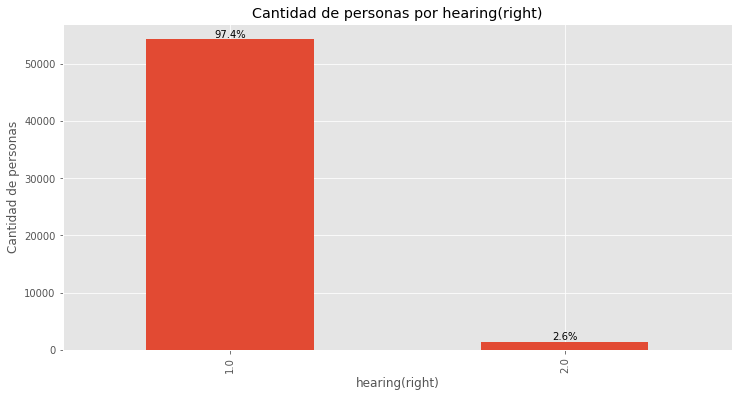

In [ ]:
graficos_exploratorios(df_eda,'hearing(right)')

Teniendo en cuenta que valores mayores a 1.5 indican deficit auditivo podemos ver que el 2.6% de las personas en el dataset tienen deficit auditivo en el oído izquierdo y un mismo porcentaje tiene deficit en el oído derecho.

In [ ]:
print("Cantidad de personas con deficit auditivo en 1 solo oído:",str(df_eda[df_eda['hearing(left)']!=df_eda['hearing(right)']].shape[0]))

Cantidad de personas con deficit auditivo en 1 solo oído: 1375


Esto nos permite saber que el 2.6% obtenido mediante los gráficos anteriores no corresponde únicamente a personas con déficit en ambos oídos sino que existen personas con deficit únicamente en uno de sus oídos.

COLUMN: Urine protein


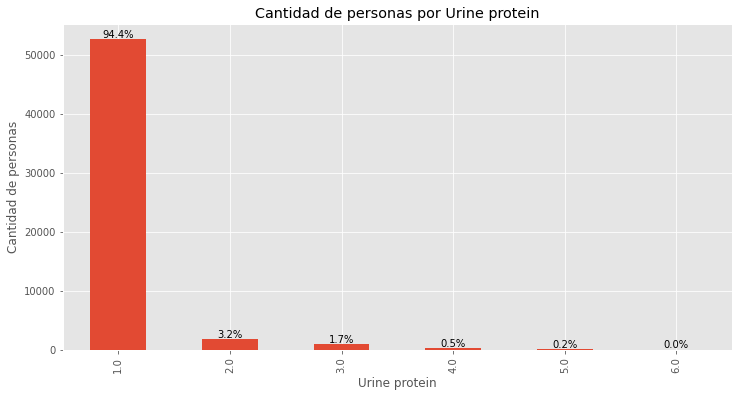

In [ ]:
graficos_exploratorios(df_eda,'Urine protein')

Teniendo en cuenta que valores mayores o 1 g/día indican un nivel alto de proteína en la orina, podemos observar que el 94.4% de las personas de nuestro set de datos se encuentran entre los parametros normales de proteína en la orina mientras que el restante 5.6% presenta proteinuria en distintos rangos.

COLUMN: dental caries


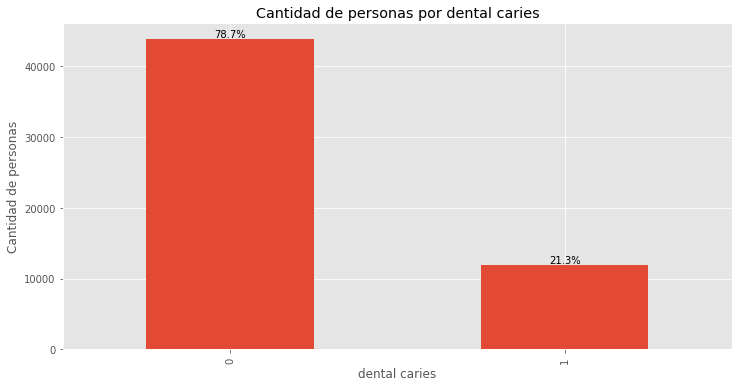

In [ ]:
graficos_exploratorios(df_eda,'dental caries')

COLUMN: tartar


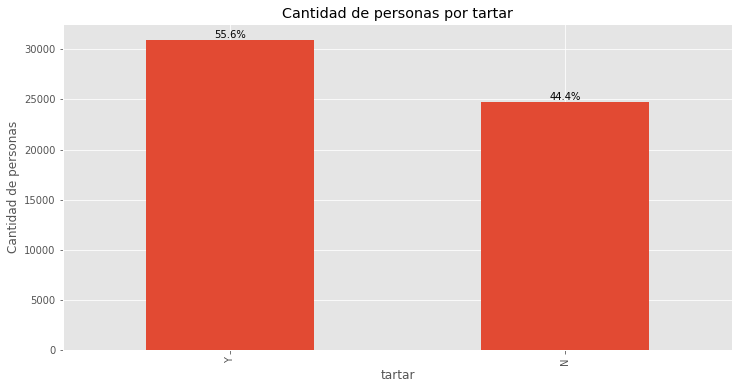

In [ ]:
graficos_exploratorios(df_eda,'tartar')

De los anteriores dos gráficos sobre variables que se desprenden del examen oral, podemos observar que un 21.3% de las personas porta caries mientras que se que un 44.4% de los mismos presentó sarro.

COLUMN: bmi_comp


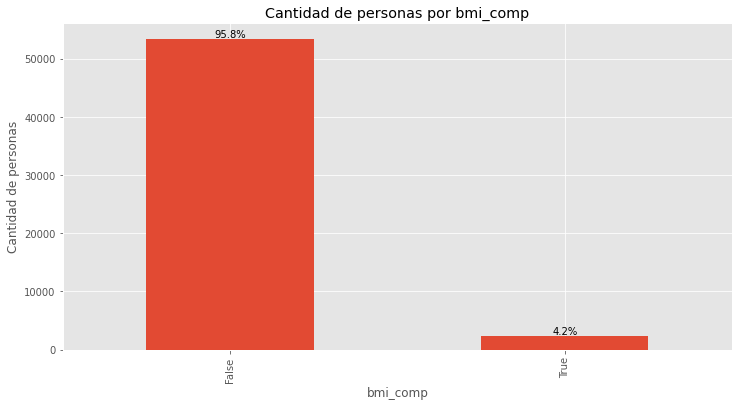

In [ ]:
graficos_exploratorios(df_eda,'bmi_comp')

Este gráfico muestra que únicamente un 4.2% de los pacientes del set de datos están por encima del promedio de indice de masa corporal obtenido de los afiliados al seguro de salud correspondiente al set de datos complementario para su grupo etario y sexo.

Conociendo ahora mas información sobre las personas en el dataset, comenzamos a contesar las preguntas de hipotesis y las ordenamos por preguntas de alto nivel para luego contestar las que son mas especificas:


# Analisis Bivariado:

##**¿Fumar aumenta el colesterol?**  
Hipotesis HDL (colesterol bueno): es alta para no fumadores. 

Hipotesis LDL (colesterol malo): el promedio es alto para fumadores.

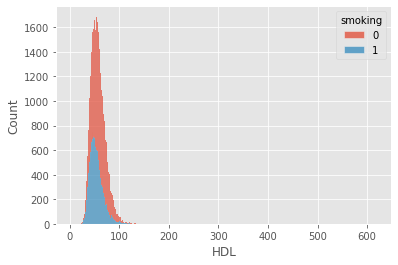

In [ ]:
sns.histplot(data=df_eda, x="HDL", hue="smoking", multiple="stack")

Resumen númerico:

In [ ]:
df_eda.HDL.describe()

count    55692.000000
mean        57.290347
std         14.738963
min          4.000000
25%         47.000000
50%         55.000000
75%         66.000000
max        618.000000
Name: HDL, dtype: float64

**Respuesta:**  
Hipotesis HDL correcta: Como muestra la gráfica, la mayoria de los no fumadores tienen un nivel alto de HDL y es menor en los fumadores.

Dejamos una clasificacion de los niveles de HDL:

In [ ]:
df_eda['clasif_HDL'] = np.where((df_eda.HDL < 40),'1. Bajo','')
df_eda['clasif_HDL'] = np.where((df_eda.HDL.between(40,59)),'2. Intermedio',df_eda.clasif_HDL)
df_eda['clasif_HDL'] = np.where((df_eda.HDL >= 60),'3. Deseable',df_eda.clasif_HDL)
df_eda[['HDL','clasif_HDL']]

,HDL,clasif_HDL
0,73.0,3. Deseable
1,42.0,2. Intermedio
2,55.0,2. Intermedio
3,45.0,2. Intermedio
4,62.0,3. Deseable
...,...,...
55687,75.0,3. Deseable
55688,73.0,3. Deseable
55689,79.0,3. Deseable
55690,48.0,2. Intermedio


Gráficamos la clasificación:

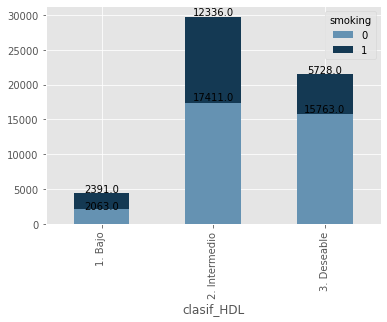

In [ ]:
df_agrupado = df_eda.groupby(['clasif_HDL','smoking']).size().reset_index().pivot(columns='smoking',index='clasif_HDL',values=0)
ax=df_agrupado.plot(kind='bar', color=['#6592b2','#143953'],stacked=True)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

plt.show()

In [ ]:
df_agrupado['porcentaje_fum'] = round(df_agrupado[1]/(df_agrupado[1]+df_agrupado[0]),2)*100
df_agrupado

smoking,0,1,porcentaje_fum
clasif_HDL,,,
1. Bajo,2063,2391,54.0
2. Intermedio,17411,12336,41.0
3. Deseable,15763,5728,27.0


Ahora veamos si la hipotesis para LDL es correcta o no.  

Primero vamos a clasificar los niveles de colesterol relacionados con la variable smoking:

In [ ]:
df_eda['clasif_LDL'] = np.where((df_eda.LDL < 100),'Deseable','NA')
df_eda['clasif_LDL'] = np.where((df_eda.LDL.between(100,159)),'Limite',df_eda.clasif_LDL)
df_eda['clasif_LDL'] = np.where((df_eda.LDL >= 160),'Alto',df_eda.clasif_LDL)
df_eda[['LDL','clasif_LDL']]

,LDL,clasif_LDL
0,126.0,Limite
1,127.0,Limite
2,151.0,Limite
3,226.0,Alto
4,107.0,Limite
...,...,...
55687,118.0,Limite
55688,79.0,Deseable
55689,63.0,Deseable
55690,146.0,Limite


Gráficamos esta clasificación:

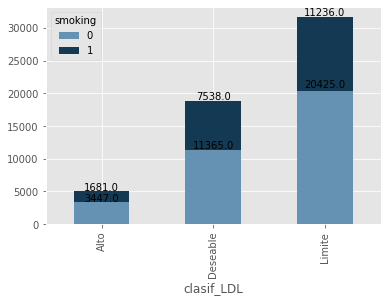

In [ ]:
df_agrupado = df_eda.groupby(['clasif_LDL','smoking']).size().reset_index().pivot(columns='smoking',index='clasif_LDL',values=0)
ax = df_agrupado.plot(kind='bar',color=['#6592b2','#143953'],stacked=True)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

plt.show()


Veamos la relacion entre LDL y los fumadores y la masa corporal:

In [ ]:
df_eda['MC_grupo'] = np.where((df_eda['weight(kg)'] < 60),'Debajo de lo normal','NA')
df_eda['MC_grupo'] = np.where((df_eda['weight(kg)'].between (60,70)),'Saludable',df_eda.MC_grupo)
df_eda['MC_grupo'] = np.where((df_eda['weight(kg)'].between(70,100)),'Sobrepeso',df_eda.MC_grupo)
df_eda['MC_grupo'] = np.where((df_eda['weight(kg)'] > 100),'Obesidad',df_eda.MC_grupo)
df_eda[['LDL','MC_grupo']]

,LDL,MC_grupo
0,126.0,Saludable
1,127.0,Saludable
2,151.0,Saludable
3,226.0,Sobrepeso
4,107.0,Saludable
...,...,...
55687,118.0,Saludable
55688,79.0,Debajo de lo normal
55689,63.0,Debajo de lo normal
55690,146.0,Saludable


Gráficamos la relación:

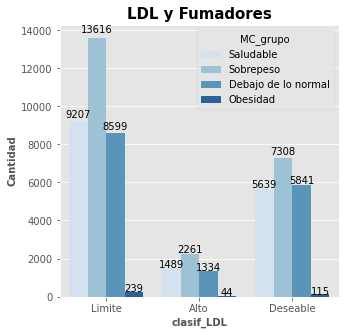

In [ ]:
fig5, ax=plt.subplots(figsize=(5,5)) 
sns.countplot(x=df_eda.clasif_LDL, hue=df_eda.MC_grupo, palette='Blues')
#for p in ax.patches:
    #ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('clasif_LDL', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad', fontsize=10, fontweight='bold')
plt.title('LDL y Fumadores', fontweight = 'bold', fontsize='15')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

plt.show()

Agrupamos para ver el detalle:

In [ ]:
df_agrupado['porcentaje_fum'] = round(df_agrupado[1]/(df_agrupado[1]+df_agrupado[0]),2)*100
df_agrupado

smoking,0,1,porcentaje_fum
clasif_LDL,,,
Alto,3447,1681,33.0
Deseable,11365,7538,40.0
Limite,20425,11236,35.0


Resumen númerico:  

In [ ]:
df_agrupado.describe().round()

smoking,0,1,porcentaje_fum
count,3.0,3.0,3.0
mean,11746.0,6818.0,36.0
std,8495.0,4818.0,4.0
min,3447.0,1681.0,33.0
25%,7406.0,4610.0,34.0
50%,11365.0,7538.0,35.0
75%,15895.0,9387.0,38.0
max,20425.0,11236.0,40.0


**Respuesta:**  
Hipotesis falsa: Al contrario del HDL, el analisis muestra que los no fumadores tienen mas LDL que los que fuman.  
Y el promedio de LDL es mas alto para ambos generos que no fuman.

## **¿Los fumadores tienen una mayor probabilidad de enfermedades del corazón?**  
Para medir el estado del corazón o predecir quién es propenso a las enfermedades cadiovazculares, la presión arterial sistólica y diastólica (relajada) son métricas comúnmente utilizadas.  
Para mas informacion ver el siguiente enlace:  
https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

In [ ]:
df_eda['presion'] = np.where((df_eda.relaxation < 80) & (df_eda.systolic<120) ,'1. Optimo','NA')
df_eda['presion'] = np.where((df_eda.relaxation.between(80,84) | df_eda.systolic.between(120,129) ),'2. Normal',df_eda.presion)
df_eda['presion'] = np.where((df_eda.relaxation.between(85,89) | df_eda.systolic.between(130,139) ),'3. Elevado',df_eda.presion)
df_eda['presion'] = np.where((df_eda.relaxation.between(90,99) | df_eda.systolic.between(140,159) ),'4. Hipertension Grado I',df_eda.presion)
df_eda['presion'] = np.where((df_eda.relaxation>=100) | (df_eda.systolic>=160) ,'5. Hipertension Grado II y III',df_eda.presion)
df_eda[['presion','systolic','relaxation']]

,presion,systolic,relaxation
0,1. Optimo,114.0,73.0
1,1. Optimo,119.0,70.0
2,3. Elevado,138.0,86.0
3,1. Optimo,100.0,60.0
4,2. Normal,120.0,74.0
...,...,...,...
55687,1. Optimo,110.0,68.0
55688,1. Optimo,101.0,62.0
55689,1. Optimo,117.0,72.0
55690,3. Elevado,133.0,76.0


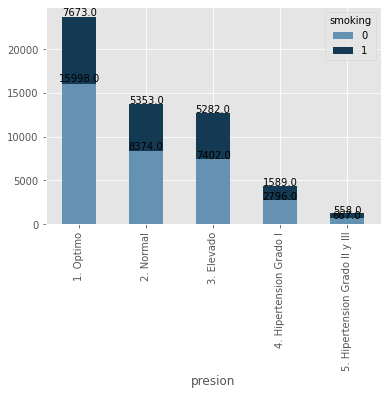

In [ ]:
df_agrupado = df_eda.groupby(['presion','smoking']).size().reset_index().pivot(columns='smoking',index='presion',values=0)
ax = df_agrupado.plot(kind='bar', color=['#6592b2','#143953'],stacked=True)


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

plt.show()

In [ ]:
df_agrupado['porcentaje_fumadores'] = round(df_agrupado[1]/(df_agrupado[1]+df_agrupado[0]),2)*100
df_agrupado

smoking,0,1,porcentaje_fumadores
presion,,,
1. Optimo,15998,7673,32.0
2. Normal,8374,5353,39.0
3. Elevado,7402,5282,42.0
4. Hipertension Grado I,2796,1589,36.0
5. Hipertension Grado II y III,667,558,46.0


Resumen númerico:

In [ ]:
df_agrupado.describe().round()

smoking,0,1,porcentaje_fumadores
count,5.0,5.0,5.0
mean,7047.0,4091.0,39.0
std,5933.0,2940.0,5.0
min,667.0,558.0,32.0
25%,2796.0,1589.0,36.0
50%,7402.0,5282.0,39.0
75%,8374.0,5353.0,42.0
max,15998.0,7673.0,46.0


**Respuesta:**  
Hipotesis correcta: gracias al analisis anterior, decimos que:  

*   El porcentaje de fumadores dentro de cada grupo de presión arterial, es el mas alto entre los que tienen crisis hipertensiva y el menor entre los que tienen presión arterial normal.
*   La cantidad máxima de personas en el conjunto de datos tiene presión arterial normal.
*   El mayor número de no fumadores se encuentra en la presión arterial normal.



## **¿Las personas que fuman tienen mayor poder visual que las personas que no fuman?**

In [ ]:
print("Promedio de agudeza visual derecha en fumadores: ",df_eda['eyesight(right)'][df_eda.smoking==1].mean())
print("Promedio de agudeza visual derecha en no fumadores: ",df_eda['eyesight(right)'][df_eda.smoking==0].mean())
print("Promedio de agudeza visual izquierda en fumadores: ",df_eda['eyesight(left)'][df_eda.smoking==1].mean())
print("Promedio de agudeza visual izquierda en no fumadores: ",df_eda['eyesight(left)'][df_eda.smoking==0].mean())

Promedio de agudeza visual derecha en fumadores:  1.04763627474945
Promedio de agudeza visual derecha en no fumadores:  0.9841104520816187
Promedio de agudeza visual izquierda en fumadores:  1.0517330725983867
Promedio de agudeza visual izquierda en no fumadores:  0.9899196866929647


Agrupamos por fumadores:

In [ ]:
summary=df_eda.groupby(["smoking"])["eyesight(left)","eyesight(right)"].mean()
summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,eyesight(left),eyesight(right)
smoking,,
0,0.989920,0.984110
1,1.051733,1.047636


Gráficamos:

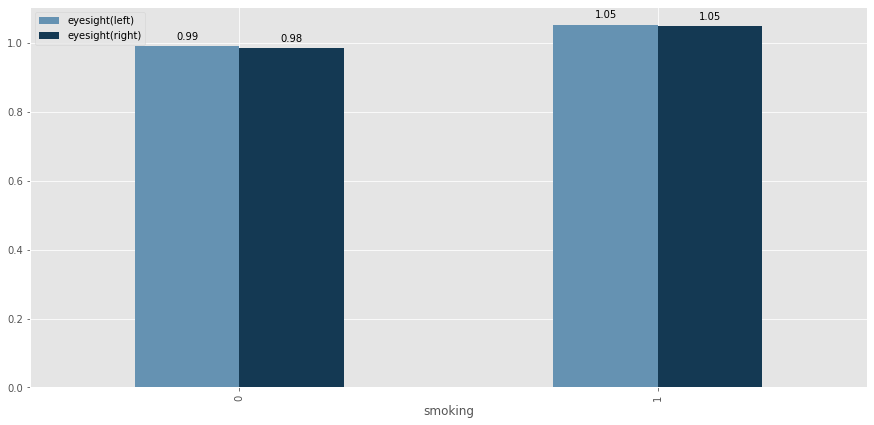

In [ ]:
ax = summary.plot(kind="bar",color=['#6592b2','#143953'],figsize=(15,7))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height,2)}', (x + width/2, y + height*1.02), ha='center')

plt.show()

Resumen numerico:

In [ ]:
summary.describe().round(2)

,eyesight(left),eyesight(right)
count,2.00,2.00
mean,1.02,1.02
std,0.04,0.04
min,0.99,0.98
25%,1.01,1.00
50%,1.02,1.02
75%,1.04,1.03
max,1.05,1.05


**Respuesta:**  
Hipotesis correcta: Las personas que fuman tienen mayor poder visual que las que no fuman.

##**¿Los fumadores tienen la hemoglobina mas alta?**

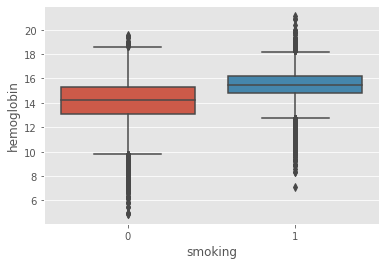

In [ ]:
sns.boxplot(x="smoking",y="hemoglobin", data=df_eda)

Resumen númerico:

In [ ]:
df_eda.hemoglobin.describe()

count    55692.000000
mean        14.622592
std          1.564498
min          4.900000
25%         13.600000
50%         14.800000
75%         15.800000
max         21.100000
Name: hemoglobin, dtype: float64

**Respuesta:**  
El siguiente analisis nos dice que la hipotesis es correcta, los niveles son altos para fumadores que para no fumadores.

**Para finalizar con el storytelling dejamos las conclusiones finales o resumen de todo lo visto anteriormente:**  
El dataset arroja los siguientes resultados:  
* Hombres = 63.6 %  
* Mujeres = 36.4 %  
* No fumadores = 63.3%  
* Fumadores = 36.7%  
* Hay mas hombres que mujeres.  
* El rango de edad (18-60) tiene mas personas entre hombres y mujeres.  
* Toda persona en el dataset es adulta.  
* El 2.6% de las personas en el dataset tienen deficit auditivo en el oído izquierdo y un mismo porcentaje tiene deficit en el oído derecho.  
Esto nos permite saber que el 2.6% obtenido mediante los gráficos anteriores no corresponde únicamente a personas con déficit en ambos oídos sino que existen personas con deficit únicamente en uno de sus oídos.  
* el 94.4% de las personas de nuestro set de datos se encuentran entre los parametros normales de proteína en la orina mientras que el restante 5.6% presenta proteinuria en distintos rangos.  
* un 21.3% de las personas porta caries mientras que un 44.4% de los mismos presentó sarro.  
* Las personas que fuman tienen mayor poder visual que las que no fuman.  
* El porcentaje de fumadores dentro de cada grupo de presión arterial, es el mas alto entre los que tienen crisis hipertensiva y el menor entre los que tienen presión arterial normal.
* La cantidad máxima de personas en el conjunto de datos tiene presión arterial normal.
* El mayor número de no fumadores se encuentra en la presión arterial normal.  
* la mayoria de los no fumadores tienen un nivel alto de HDL y es menor en los fumadores.  
* Al contrario del HDL, el analisis muestra que los no fumadores tienen mas LDL que los que fuman.  
* el promedio de LDL es mas alto para ambos generos que no fuman.
* El colesterol podria variar por otras causas ajenas al humo de tabaco.  
* los niveles de hemoglobina son altos para fumadores que para no fumadores.

# **FEATURE SELECTION**

**Elegimos el método forward selection o selección hacia adelante para reducir la dimensionalidad del dataset**


In [ ]:
#Importamos las librerias basicas para construir modelos de clasificación
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

!pip install mlxtend
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Gracias al EDA, pudimos ver el tipo de datos de cada variable del dataset, y conocimos cuales son las variables object, para evaluar los modelos necesitamos cambiar el tipo de datos de las variables object a numero.

In [ ]:
# Cambiamos el tipo de datos de la columna gender

le = LabelEncoder()
le.fit(df_final["gender"])
df_final["gender"]=le.transform(df_final["gender"])  

# Cambiamos el tipo de datos de la columna oral 

l = LabelEncoder()
l.fit(df_final["oral"])
df_final["oral"]=l.transform(df_final["oral"])

# Cambiamos el tipo de datos de la columna tartar 

a = LabelEncoder()
a.fit(df_final["tartar"])
df_final["tartar"]=a.transform(df_final["tartar"])

# Cambiamos el tipo de datos de la columna bmi_comp 

#a = LabelEncoder()
#a.fit(df_final["bmi_comp"])
#df_final["bmi_comp"]=a.transform(df_final["bmi_comp"])

Se setean los parámetros necesarios para ejecutar el método de selección. Se decide escoger 15 variables (k_features=15) dado que mediante pruebas realizadas se llegó a la conclusión de que es lo que mejor se ajusta al problema.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=15,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
#Definimos un valor X1 con las variables independientes y un valor Y1 con la variable objetivo
X1 = df_final.drop(columns="smoking")           
y1 = df_final["smoking"]   

In [ ]:
sfs.fit(X1, y1)
print('Las variables seleccionadas por el método de forward selection fueron las siguientes:')
sfs.k_feature_names_ #Lista final de features

Las variables seleccionadas por el método de forward selection fueron las siguientes:


('gender',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'hemoglobin',
 'serum creatinine',
 'ALT',
 'Gtp',
 'dental caries',
 'tartar',
 'bmi',
 'calc_bmi',
 'bmi_comp')

Estas son las variables que nos importan mas la variable smoking que no se tuvo en cuenta para hacer el metodo de feature selection ya que es la variable principal que no debe ser descartada en ningun caso.

## **ELECCIÓN DEL MODELO DE CLASIFICACIÓN**

El algoritmo de clasificación escogido para entrenar con los datos es "Random Forest" ya que fue con el que se obtuvieron mejores resultados en el Proyecto Complementario.

In [ ]:
#Definimos un valor X y un valor Y, y cortamos los datos entrenados
X = df_final[list(sfs.k_feature_names_)] 
y = df_final["smoking"]    # y = quality
print(X.head())

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)


RFR = RandomForestClassifier(n_estimators=150,random_state=250)
RFR.fit(X_train,y_train)
ypred = RFR.predict(X_test)
print(RFR,":",accuracy_score(y_test,ypred)*100)

   gender  systolic  relaxation  fasting blood sugar  Cholesterol  \
0       0     114.0        73.0                 94.0        215.0   
1       0     119.0        70.0                130.0        192.0   
2       1     138.0        86.0                 89.0        242.0   
3       1     100.0        60.0                 96.0        322.0   
4       0     120.0        74.0                 80.0        184.0   

   triglyceride  hemoglobin  serum creatinine   ALT   Gtp  dental caries  \
0          82.0        12.9               0.7  19.0  27.0              0   
1         115.0        12.7               0.6  19.0  18.0              0   
2         182.0        15.8               1.0  16.0  22.0              0   
3         254.0        14.7               1.0  26.0  18.0              0   
4          74.0        12.5               0.6  14.0  22.0              0   

   tartar        bmi   calc_bmi  bmi_comp  
0       1  30.821418  24.973985     False  
1       1  30.821418  23.437500     Fals

## **CÁLCULO DE MÉTRICAS PARA VALIDAR EL MODELO**

In [ ]:
from sklearn import metrics # IMPORTAMOS METRICS PARA MEDIR EL DESEMPEÑO DEL MODELO

In [ ]:
preds = RFR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

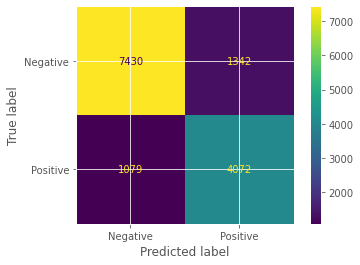

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(RFR, X_test, y_test, display_labels=['Negative', 'Positive'])

In [ ]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion

array([[7430, 1342],
       [1079, 4072]])

La matriz de confusión arroja los siguientes resultados:

In [ ]:
print('Verdaderos Positivos: ', confusion[1,1])
print('Verdaderos Negativos: ', confusion[0,0])
print('Falsos Positivos: ', confusion[0,1])
print('Falsos Negativos: ', confusion[1,0])

Verdaderos Positivos:  4072
Verdaderos Negativos:  7430
Falsos Positivos:  1342
Falsos Negativos:  1079


A simple vista gracias a la visual de la matriz podemos ver que el modelo es balanceado. Concentrandonos en las diagonales de color morado, podemos ver que en nuestro caso no supera ni el 20% del dataset.
Si estuviera en overfitting el cuadrado morado que se encuentra arriba del cuadrado verde, tendria valores mucho mas bajos que el otro cuadrado morado.
En nuestro caso habria que mantener o aumentar los verdaderos (positivos/negativos) y disminuir los falsos (positivos/negativos).

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.826115061409179

In [ ]:
print("Precisión positiva: ",metrics.precision_score(y_test, preds, pos_label=1)," y precisión negativa: ",metrics.precision_score(y_test, preds, pos_label=0))

Precisión positiva:  0.7521241226449945  y precisión negativa:  0.8731930896697614


In [ ]:
print("Sensibilidad: ",metrics.recall_score(y_test, preds, pos_label=1)," y Especificidad: ",metrics.recall_score(y_test, preds, pos_label=0))

Sensibilidad:  0.7905261114346729  y Especificidad:  0.8470132238942089


In [ ]:
print("F1 Positivo: ",metrics.f1_score(y_test, preds, pos_label=1)," y F1 Negativo: ",metrics.f1_score(y_test, preds, pos_label=0))

F1 Positivo:  0.7708471367723616  y F1 Negativo:  0.8599039407441699


Si analizamos estos valores, la sensibilidad se encuentra en un 0.79 acercando al accuracy, igual que todos los otros valores.
Por ejemplo el F1 Negativo se encuentra por encima pero por muy poco.
Esto signica que hay una proporcion de clases muy buena en el dataset ya que el modelo es balanceado.